# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

In [3]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and check the dataset

In [34]:
weather = pd.read_csv("Summary of Weather.csv")
weather.head()

C:\Users\jaqli\AppData\Local\Temp\ipykernel_1904\1093861182.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("Summary of Weather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Clean the dataset, drop variables

<Axes: >

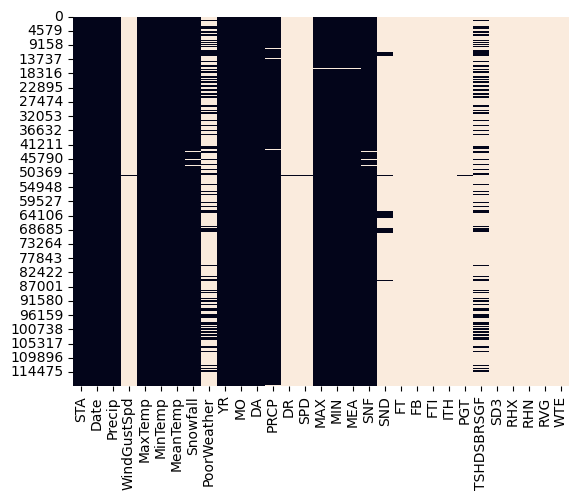

In [35]:
sns.heatmap(weather.isnull(), cbar=False)

In [38]:
np.all(weather["PoorWeather"].dropna() == weather["TSHDSBRSGF"].dropna())
weather["SND"].unique()

array([nan,  0.])

In [94]:
weather["One"] = weather["PoorWeather"] == 1

In [41]:
weather["PoorWeather"].dropna().unique()

array(['1', '1     1', '1 1', '1     1  1', '1  1', '1        1', '0',
       '1   1 1', '1    1', '1     0', '1000', '1001', '100000',
       '1000001000', '101000', '101001', '1000001001', '1000101001',
       '100001', '1000000000', '1000101000', '1010001000', '1000100000',
       '1000100001', '1010001001', '10001001', '11', '11 1', '11    1',
       '1100000', '1 1  1', '1 0  1', '1 0', '1   1 1  1', '1000000',
       '1101000', '1101001', '1   1', 1.0], dtype=object)

In [ ]:
cleanWeather = weather.loc[:, weather.isnull().mean()<0.9]
# cleanWeather.loc["PoorWeather"] = cleanWeather["PoorWeather"] == '0'
cleanWeather = cleanWeather.drop("TSHDSBRSGF", axis = 1)
cleanWeather = cleanWeather.dropna(axis=0)
cleanWeather = cleanWeather.sort_values("Date")
cleanWeather.head()


C:\Users\jaqli\AppData\Local\Temp\ipykernel_1904\2728267939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanWeather.loc["PoorWeather"] = cleanWeather["PoorWeather"] == '0'


,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
4071,10502.0,1941-10-10,12.7,31.666667,21.666667,26.666667,0.0,1,41.0,10.0,10.0,0.5,89.0,71.0,80.0,0.0
4079,10502.0,1941-10-18,0.254,32.222222,22.222222,27.222222,0.0,1,41.0,10.0,18.0,0.01,90.0,72.0,81.0,0.0
4080,10502.0,1941-10-19,7.112,34.444444,22.222222,28.333333,0.0,1,41.0,10.0,19.0,0.28,94.0,72.0,83.0,0.0
4063,10502.0,1941-10-2,6.35,32.222222,21.111111,26.666667,0.0,1,41.0,10.0,2.0,0.25,90.0,70.0,80.0,0.0
4084,10502.0,1941-10-23,T,33.333333,21.111111,27.222222,0.0,1,41.0,10.0,23.0,T,92.0,70.0,81.0,0.0


4071      12.7
4079     0.254
4080     7.112
4063      6.35
4084         T
         ...  
29024    0.508
75534    2.794
15137        T
95280    15.24
52236     1.27
Name: Precip, Length: 33610, dtype: object

In [55]:
cleanWeather.isnull().any().any()

False

In [58]:
len(cleanWeather)

115697

In [75]:
len(cleanWeather["Date"].unique())

2192

In [92]:
len(cleanWeather["STA"].unique())

144

In [90]:
weather["HasTag"] = weather["PoorWeather"].isna()

In [ ]:
weather = weather.sort_values("Date")


([<matplotlib.axis.XTick at 0x1f69c3d9910>,
 [Text(0, 0, '1941-10-10'),
  Text(365, 0, '1943-1-9'),
  Text(730, 0, '1944-1-9'),
  Text(1095, 0, '1945-1-8'),
  Text(1460, 0, ''),
  Text(1825, 0, ''),
  Text(2190, 0, '')])

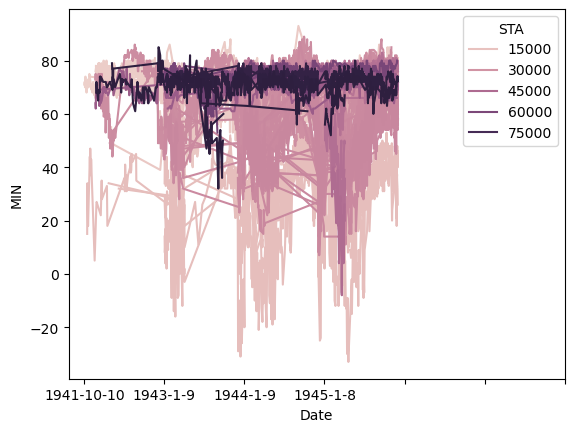

In [ ]:

sns.lineplot(x='Date', y='MIN', data=cleanWeather, hue = "STA")
plt.xticks(range(0,1100,365))

## 3. Select the feature(s) for the model, and explain the reason

In [76]:
# write your answer here

## 4. Split the dataset (80% for training, 20% for testing)

## 5. Choose the algorithm, train and test the model

## 6. Evaluate and Visualize model Performance

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [77]:
# write your answer here

## 8. Discuss the model performance based on the plot

In [78]:
# write your answer here